In [0]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [0]:
dataset = pd.read_csv('iris.csv')

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [0]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:

# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [12]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [14]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [0]:
#nearest neighbours

from sklearn import datasets 
import numpy as np 
import random 
import matplotlib.pyplot as plt 

iris = datasets.load_iris() 
	# >>>iris["data"] 
predictors = iris.data[:, 0:2] 
outcomes = iris.target 


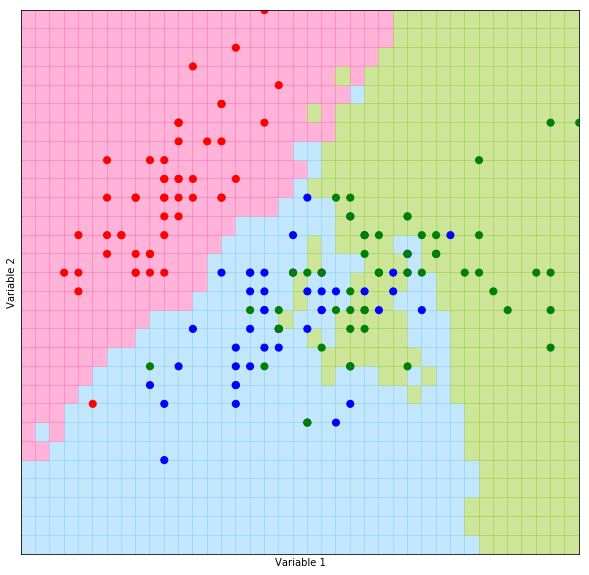

In [33]:
k = 5; filename ="iris_grid.pdf"; limits =(4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k) 
plot_prediction_grid(xx, yy, prediction_grid, filename) 
plt.show() 

In [0]:

from sklearn.neighbors import KNeighborsClassifier #predictions from skikit 
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(predictors, outcomes) 
sk_predictions = knn.predict(predictors)  

In [36]:
# >>>sk_predictions == my_predictions 
# >>>np.mean(sk_predictions == my_predictions) 
print(" prediction by KNN : ") 
print(100 * np.mean(sk_predictions == outcomes))

 prediction by KNN : 
83.33333333333334


In [49]:
confusion_matrix(outcomes, sk_predictions)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

In [0]:
#decision tree

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('iris.csv')

In [27]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [0]:
all_inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_classes = df['species'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)


In [47]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
predict=dtc.predict(test_inputs)
dtc.score(test_inputs, test_classes)

0.9555555555555556

In [45]:
confusion_matrix(test_classes, predict)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

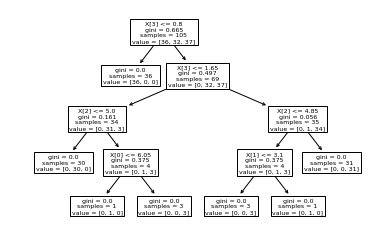

In [48]:
tree.plot_tree(dtc.fit(train_inputs,train_classes))